# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
from google.colab import files
upload=files.upload()

Saving insurance2.csv to insurance2.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed


In [4]:
#medical = pd.read_csv('data/insurance2.csv')
#/content/insurance2.csv
medical = pd.read_csv('/content/insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

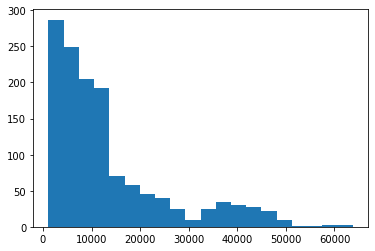

In [11]:
plt.hist(medical['charges'], bins=20);

In [13]:
sample_mean = np.mean(medical.charges)
sample_mean

13270.422265141257

In [9]:
sample_std = np.std(medical.charges,ddof=1)
sample_std

12110.011236694001

**Comment on the appropriateness of these statistics for the data**

Based on the histogram above, the data appears to be skewed to the right. Therefore, the mean is unlikely to be representative of a "typical" value since the mean is impacted by the large values in the distribution's right tail. **Median** may be a better measure here.

Similarly, the standard deviation is not a great measure here. It does not represent the fact that the variability in the data is not symmetrical (the extreme values tend to fall to the right). Also, the standard deviation calculation relies on the mean which (as mentioned above) is not a great measure here. The **InterQuartile Range** may be a better measure for this data as well.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
The population parameters for standard deviation and mean are unknown, since the data is drawn from a sample. Therefore, the Z-test is not an appropriate test. The T-test can be used with a sample mean and standard deviation (unknown population parameters). Therefore, the T-test is the more appropriate test in this situation.

Also, the T-test is not appropriate for non-normal distributions when the sample size is small. However, in this case we have a large sample of data and, therefore, the T-test can be used. This is because as sample size increases, the sampling distribution of the mean approaches normal even though the distribution of the original sample is not normal (Central Limit Theorem).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
One-sided confidence interval is appropriate here. The administrator is concerned that the population mean has fallen below 12,000, not that the population mean is not close to 12000. We are not worried about an increasing population mean.

In [14]:
t_critical_value = t.ppf(0.95,len(medical['charges'])-1)
t_critical_value

1.6459941145571317

In [15]:
moe_95 = t_critical_value * (sample_std/np.sqrt(len(medical['charges'])))
moe_95

544.9350813250254

In [16]:
sample_mean - moe_95

12725.48718381623

In [17]:
sample_mean + moe_95

13815.357346466282

95% confidence interval is between 12725.48 to 13815.35

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis: people with insurance are charged the same amount as people without insurance

Alternative Hypothesis: people with insurance are charged a different amount than people without insurance

Here we are assuming that the variances between the two populations (people with insurance, people without insurance) are roughly equivalent. This is because the pooled standard deviation is calculated using the variance from each group as a multiplier. If the variances are not roughly equivalent, then the pooled standard deviation will fall somewhere between the two group standard deviations but will not be a good representation of the standard deviation for either group.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

**Manually:**

In [18]:
insured_group = medical.query('insuranceclaim == 1')
insured_group.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [19]:
uninsured_group = medical.query('insuranceclaim == 0')
uninsured_group.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [20]:
#get the pooled standard deviation
pooled_std = np.sqrt(((len(insured_group.charges) -1) * np.var(insured_group.charges,ddof=1) \
    + (len(uninsured_group.charges) -1) * np.var(uninsured_group.charges,ddof=1)) \
    / (len(insured_group.charges) + len(uninsured_group.charges) - 2))
pooled_std

11520.03426877526

In [21]:
#get the t-test statistic
t_test_stat = (np.mean(insured_group.charges) - np.mean(uninsured_group.charges)) \
    / (pooled_std * np.sqrt(1/len(insured_group.charges) + 1/len(uninsured_group.charges)))
t_test_stat

11.893299030876712

In [22]:
#get the p-value
area_under_left_tail = t.cdf(-1*t_test_stat, df=len(medical.charges) -2)
p_value = area_under_left_tail * 2
p_value

4.461230231620717e-31

**Scipy:**

In [23]:
from scipy.stats import ttest_ind
ttest_ind(insured_group.charges,uninsured_group.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

There does not appear to be to be an equivalent function for performing z-tests from samples. This is likely because z-tests should be used when the population standard deviation is known. Statistical test functions make inferences from sample statistics - not population parameters.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test